In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
x,y=mnist["data"],mnist["target"]
x.shape

(70000, 784)

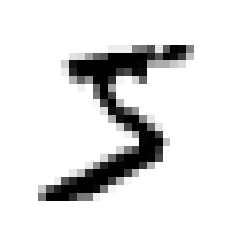

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
some_digit=x[0]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
knn_clf.score(x_test,y_test)

0.9697142857142858

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint
param_distribs = {'n_neighbors': randint(low=3, high=20)} 
rnd_search = RandomizedSearchCV(knn_clf, param_distributions=param_distribs, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42) 
rnd_search.fit(x_train,y_train)